In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model
import pandas as pd

from os import path
import re
from tqdm.notebook import tqdm
from pymodulon.util import _parse_sample

In [2]:
ica_data = load_json_model('../../putidaPRECISE321.json')

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

# Fig 3a

In [4]:
# Explained variance for the stationary phase sample

sum=(explained_variance(ica_data,samples="SRX2021822")+explained_variance(ica_data,samples="SRX2021823"))/2

sum

0.6778361446608445

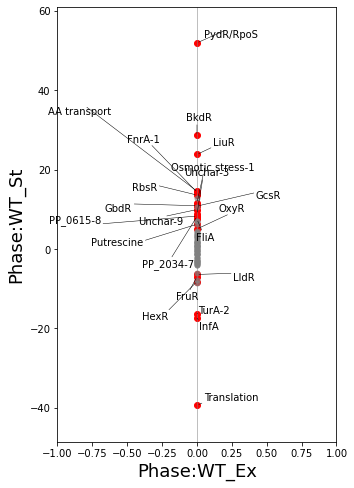

In [5]:
fig, df_diff=plot_dima(ica_data,"Phase:WT_Ex","Phase:WT_St", table=True,
                       threshold=5,
                       fdr=0.05,
                       legend_kwargs={'fontsize':14},
                       ax_font_kwargs={'fontsize':18}, 
                       colors={'red'}
                      )

fig.figure.set_size_inches(5,8)

In [6]:
fig.get_figure().savefig('./raw_files_new/Fig3a.svg')

In [7]:
df_diff.index.size

22

In [8]:
len(df_diff[df_diff['difference']>0].index)

16

In [9]:
len(df_diff[df_diff['difference']<0].index)

6

# Fig 5d

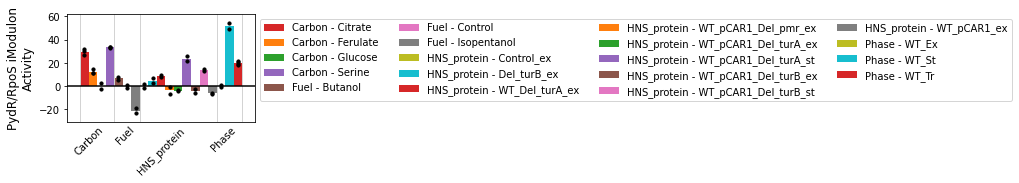

In [10]:
fig=plot_activities(ica_data,'PydR/RpoS', 
                    projects={'Fuel','HNS_protein','Phase','Carbon'},
                    highlight={'Fuel','HNS_protein','Phase','Carbon'}
                    )

In [11]:
fig.get_figure().savefig('./raw_files_new/Fig3b1_pydR_rpoS.svg')

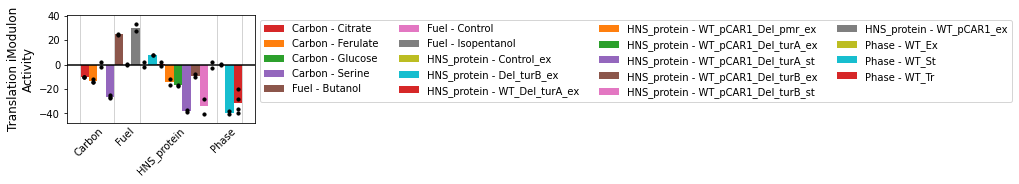

In [12]:
fig2=plot_activities(ica_data,'Translation', 
                    projects={'Fuel','HNS_protein','Phase','Carbon'},
                    highlight={'Fuel','HNS_protein','Phase','Carbon'}
                    )

In [13]:
fig2.get_figure().savefig('./raw_files_new/Fig3b2_translation.svg')

# Fig 5c

In [14]:
groups={"SRX7584776":"pCAR1_DturA_stationary",
        "SRX7584774":"pCAR1_DturA_stationary",
        "SRX7584785":"pCAR1_DturB_stationary",
        "SRX7584779":"pCAR1_DturB_stationary",
        "SRX2021822":"Stationary",       
        "SRX2021823":"Stationary",       
        "SRX2020724":"Transition",       
        "SRX2020727":"Transition",       
        "SRX2021820":"Transition",   
        "SRX2021821":"Transition",          
        "SBRG_Stress3__isopentanol__1":"Isopentanol",
        "SBRG_Stress3__isopentanol__2":"Isopentanol",
        "SBRG_Stress3__butanol__1":"Butanol",
        "SBRG_Stress3__butanol__2":"Butanol",       
       }

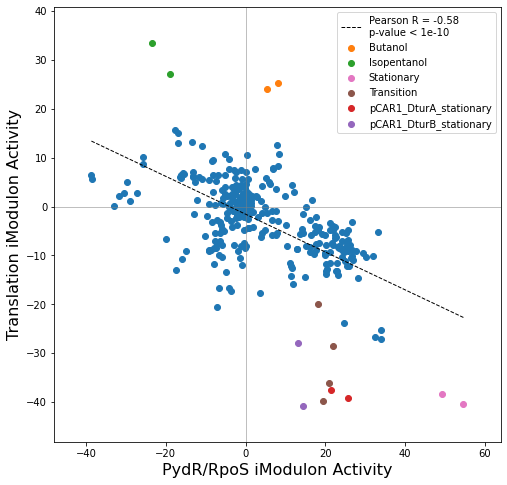

In [15]:
fig=compare_activities(ica_data,'PydR/RpoS','Translation',
                           legend_kwargs={'fontsize':10},
                       groups=groups,
                      ax_font_kwargs={'fontsize':16},
                     )

fig.figure.set_size_inches(8,8)


In [16]:
fig.get_figure().savefig("./raw_files_new/Fig3c_PydR_Tn_scat.svg")